# Assignment Template
Use this template as a guide for building up the **Bespot** data science assignment task.

## Step 1: Dataset & Dependencies
Import every necessary dependency library or dataset here.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_breast_cancer
import warnings
from sklearn import metrics
import pickle
warnings.filterwarnings('ignore')

In [2]:
# Import data / use them as data frame

df = load_breast_cancer(as_frame=True)
data = df.frame

## Step 2: Exploratory Analysis
Analyze the dataset using their statistical summary and graphical representation to discover trends and patterns.

In [3]:
# First overiview

df

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [4]:
print('Target variables  : ', df['target_names'])

(unique, counts) = np.unique(df['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)


Target variables  :  ['malignant' 'benign']
Unique values of the target variable [0 1]
Counts of the target variable : [212 357]


<function matplotlib.pyplot.show(close=None, block=None)>

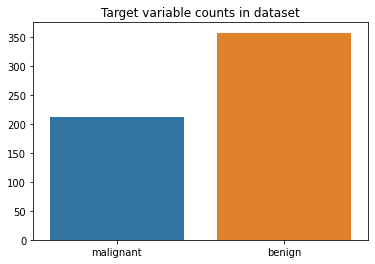

In [5]:
# B-M distribution

sns.barplot(x=df['target_names'], y=counts)
plt.title('Target variable counts in dataset')
plt.show

In [6]:
# Overview of the data frame

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data.shape

(569, 31)

In [8]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [9]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [10]:
data['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [11]:
# check for missing values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
# statistics summary of features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
# Class distribution
target = data['target'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=212, Percentage=37.258%
Class=1, Count=357, Percentage=62.742%


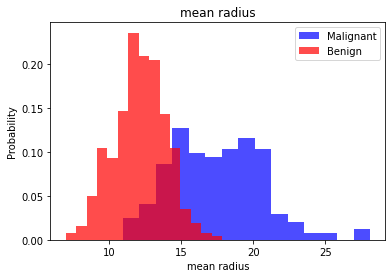

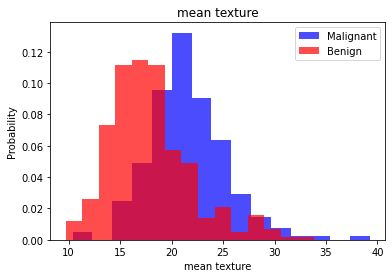

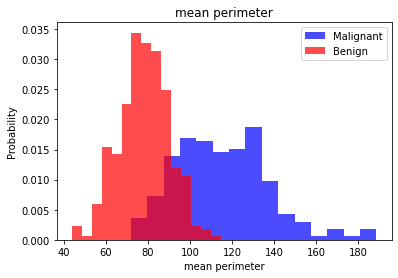

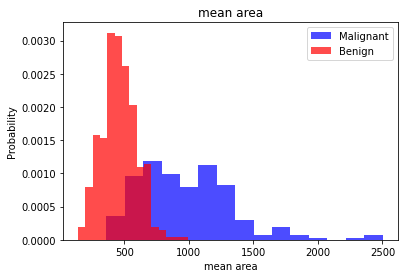

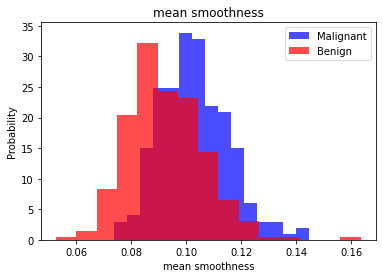

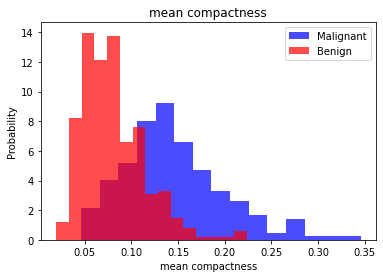

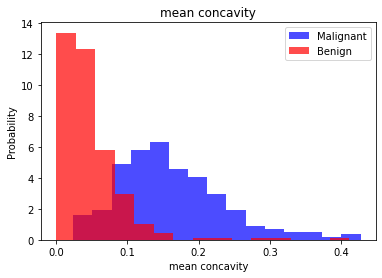

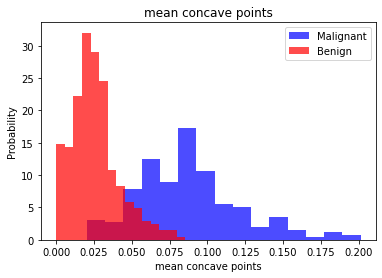

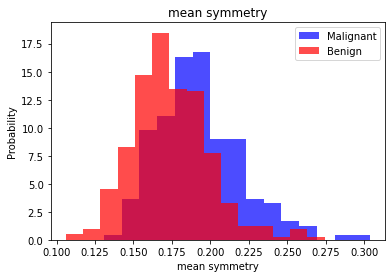

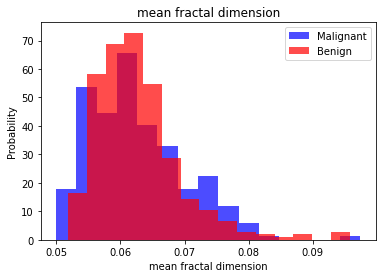

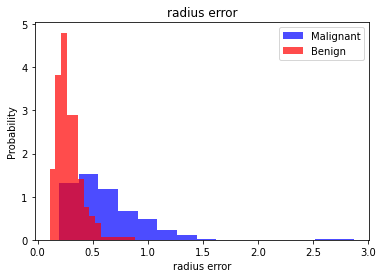

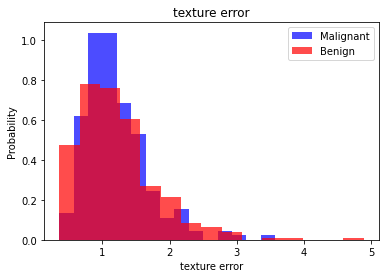

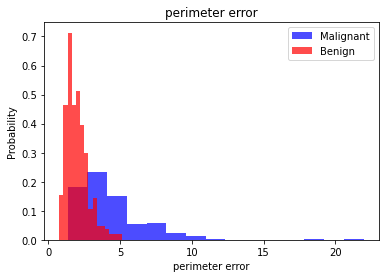

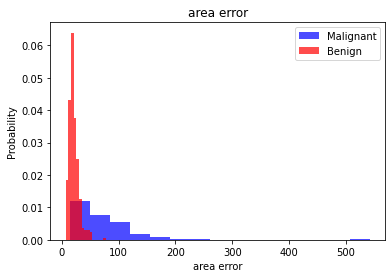

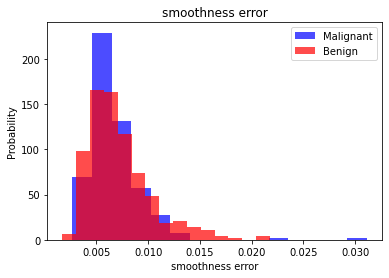

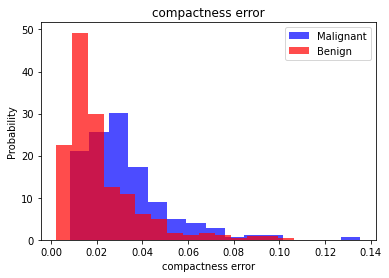

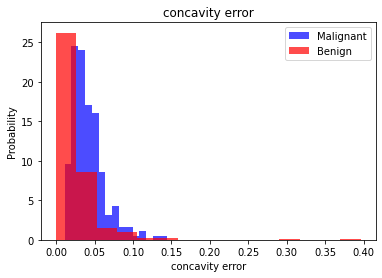

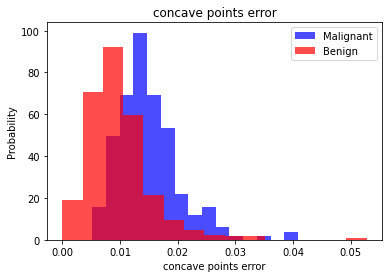

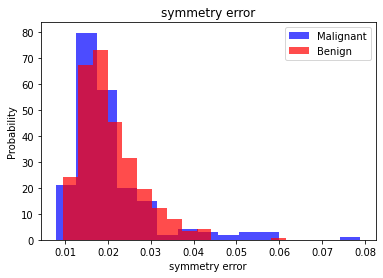

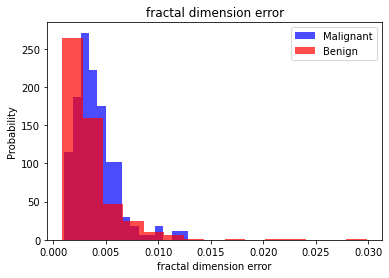

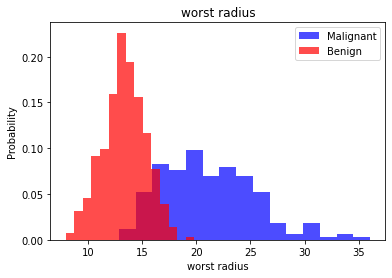

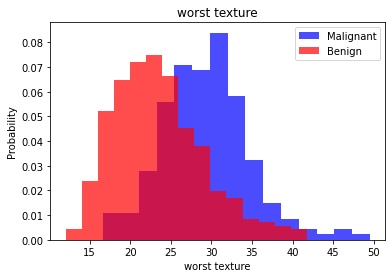

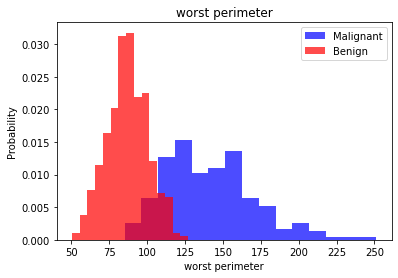

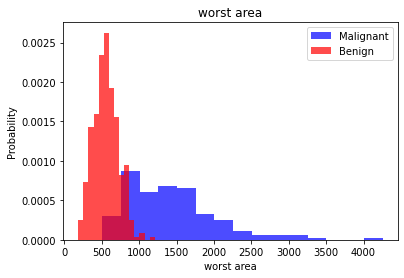

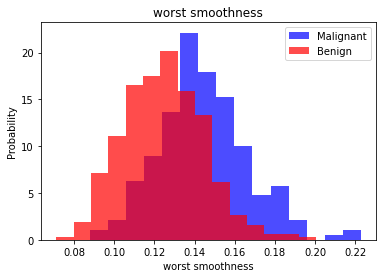

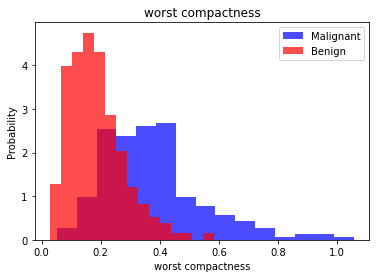

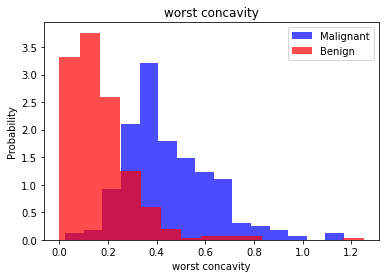

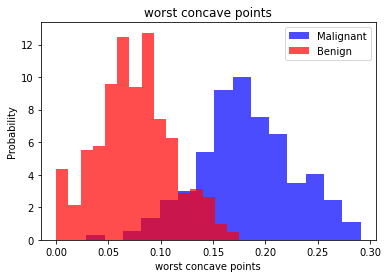

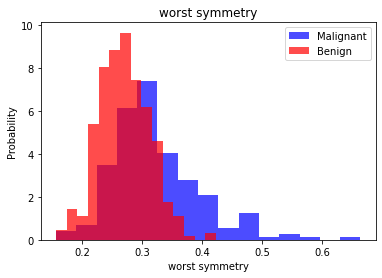

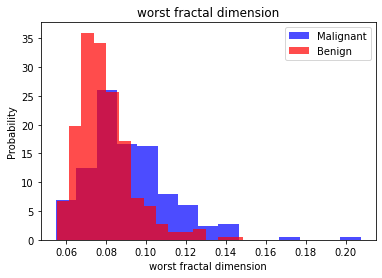

In [14]:
# Univariate plots

for i in range(len(data.columns[:-1])):
  label = data.columns[i]
  plt.hist(data[data['target']==0][label], color='blue', label="Malignant", alpha=0.7, density=True, bins=15)
  plt.hist(data[data['target']==1][label], color='red', label="Benign", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

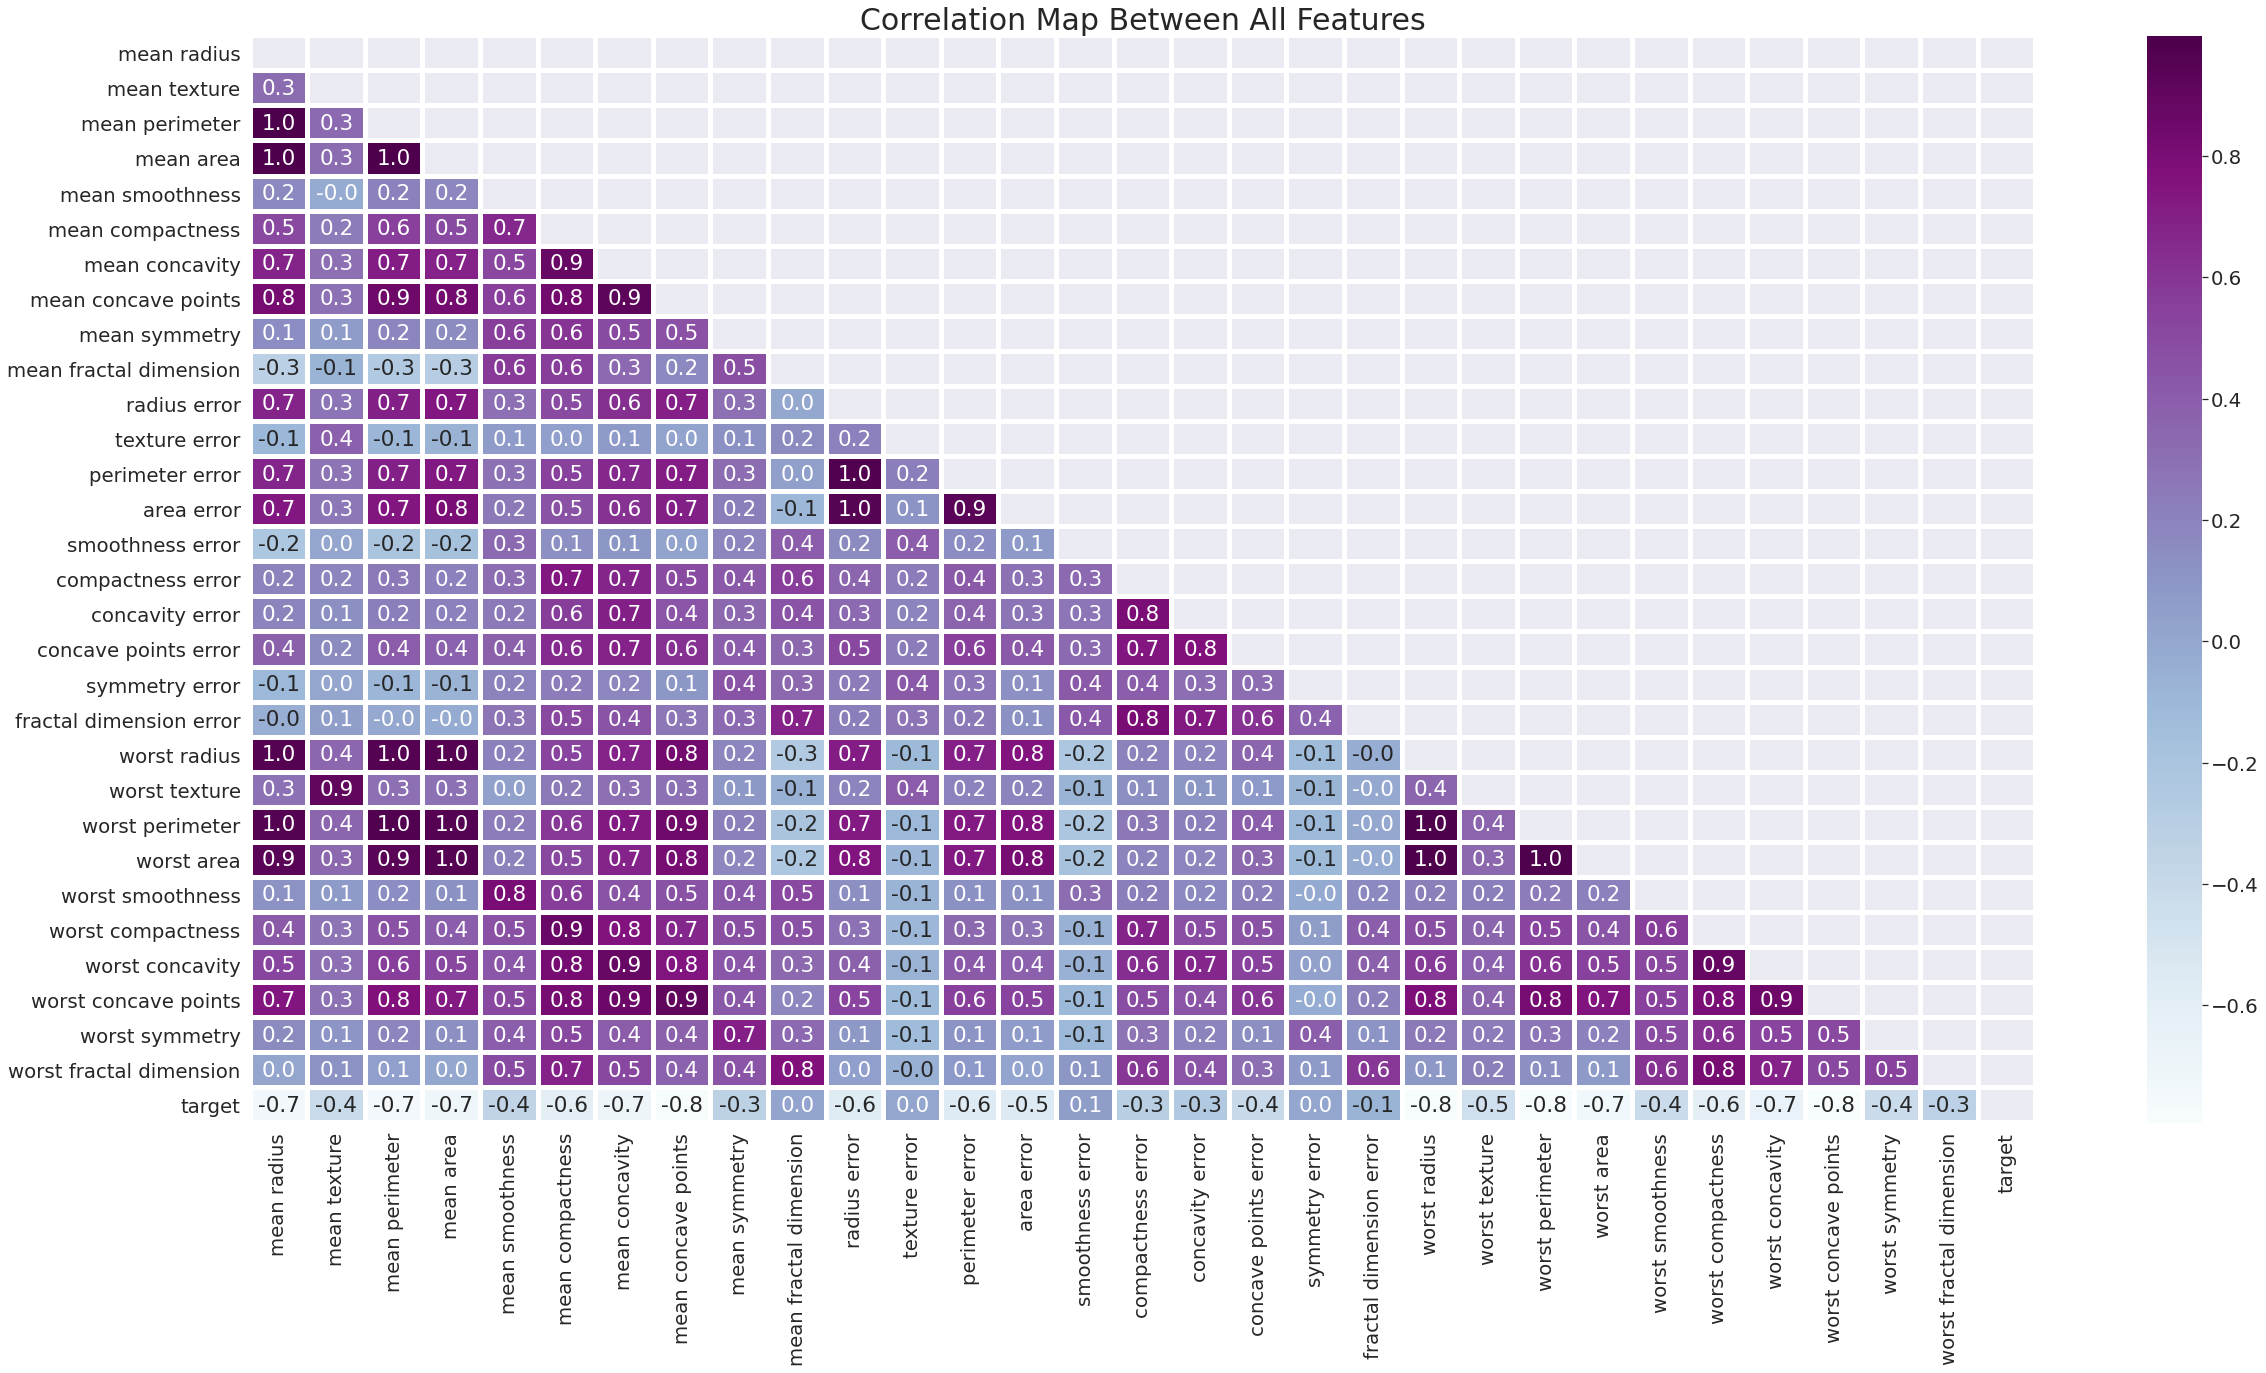

In [15]:
# Multivariate plots
sns.set(font_scale=1.8)
corr = data.corr()
plt.figure(figsize=(40,20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='BuPu', linewidths=4, fmt= '.1f', annot=True, mask=mask)
plt.title("Correlation Map Between All Features", fontsize = 30)
plt.show()

## Step 3: Data Preparation
Clean, wrangle, scrub or collect more data. 

## Step 4: Feature Enginering
Do all the preprocessing steps to transform the data into features to be used in the machine learning algorithms.

In [16]:
# Exclude high correlated features which would cause multicollinearity (thres = 0.85)
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.85)
new_data = correlated.fit_transform(data)

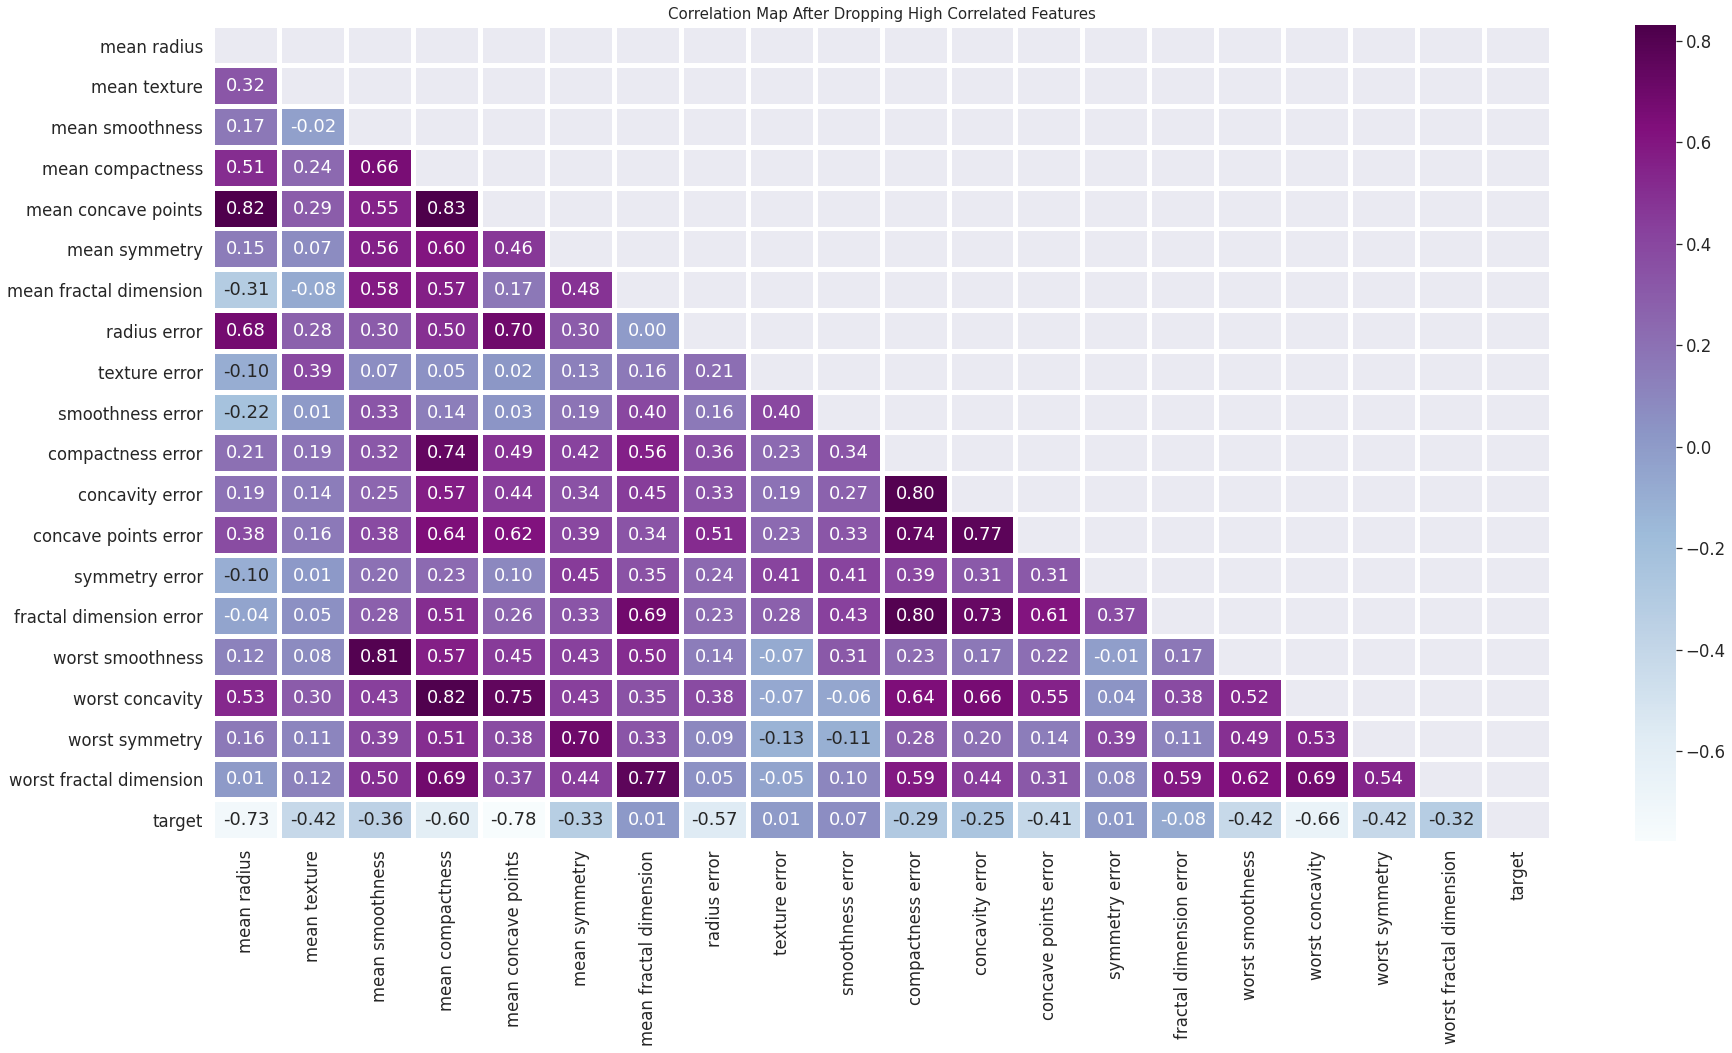

In [17]:
corrmat = new_data.corr(method='pearson')
sns.set(font_scale=1.5)
plt.figure(figsize=(30,15))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, cmap='BuPu', linewidths=4, fmt= '.2f', annot=True, mask=mask)
plt.title("Correlation Map After Dropping High Correlated Features", fontsize=15)
plt.show()

In [18]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('target',axis=1), new_data['target'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 19), (171, 19))

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Algorithm Selection, Training and Evaluation
Define a list of algorithms, define the scoring function and evaluate each algorithm performance based on the selected metrics.

In [20]:
# useful finctions
def evaluate_each_model(scoring):
    # evaluate each model in turn
    results = []
    names = []
    print('Using metric: %s ' % scoring)
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison (metric: %s)' % scoring)
    plt.xticks(rotation = 45,Fontsize = 10) 
    plt.show()
    
def model_specs(model,model_name):
    sns.set(font_scale=1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    print("Accuracy: %", "{:.4f}".format(accuracy_score(y_test,predictions)*100))
    print("Precision: %", "{:.4f}".format(precision_score(y_test,predictions)*100))
    print("F1 score: %", "{:.4f}".format(f1_score(y_test,predictions)*100))
    print("\nConfusion Matrix")
    sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    plt.title(model_name)
    y_probas = model.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, cmap='rainbow',figsize=(6,6))


Using metric: accuracy 
LR: 0.977436 (0.023593)
LDA: 0.952051 (0.031138)
KNN: 0.954679 (0.036922)
CART: 0.922051 (0.032675)
NB: 0.934744 (0.040529)
SVM: 0.967372 (0.037140)
RF: 0.952115 (0.038118)


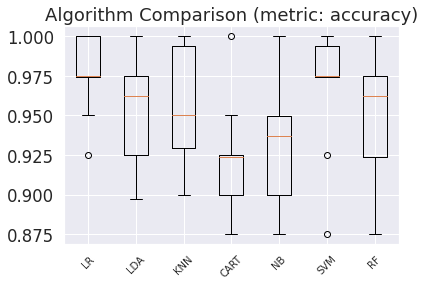

Using metric: precision 
LR: 0.972887 (0.024311)
LDA: 0.933801 (0.041068)
KNN: 0.947791 (0.042423)
CART: 0.936976 (0.034365)
NB: 0.934445 (0.033972)
SVM: 0.964590 (0.028000)
RF: 0.953568 (0.037068)


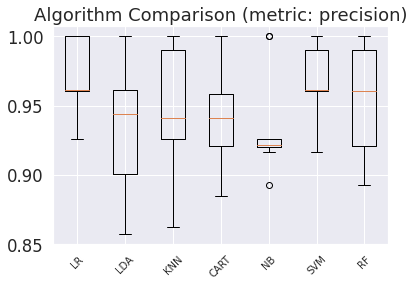

Using metric: recall 
LR: 0.992000 (0.024000)
LDA: 0.996000 (0.012000)
KNN: 0.983833 (0.036773)
CART: 0.939833 (0.036791)
NB: 0.964000 (0.045431)
SVM: 0.984000 (0.036661)
RF: 0.971833 (0.036059)


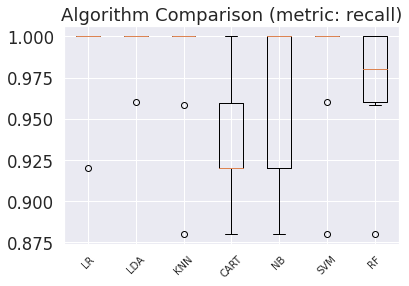

Using metric: f1 
LR: 0.982108 (0.018964)
LDA: 0.963415 (0.023277)
KNN: 0.964638 (0.029150)
CART: 0.937767 (0.026099)
NB: 0.948443 (0.032854)
SVM: 0.974030 (0.030137)
RF: 0.962168 (0.030493)


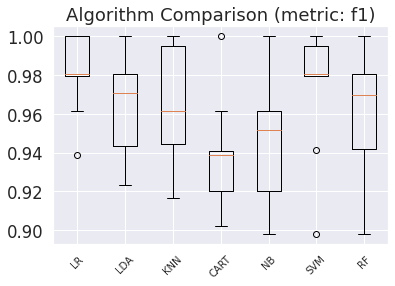

In [21]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto',probability = True)))
models.append(('RF',RandomForestClassifier(random_state=0)))
# Select metric

scoring = 'accuracy'  #'accuracy' #, 'precision', 'recall', 'f1']

# Check different metrics for evaluation
evaluate_each_model('accuracy')
evaluate_each_model('precision')
evaluate_each_model('recall')
evaluate_each_model('f1')


Accuracy: % 97.0760
Precision: % 97.2477
F1 score: % 97.6959

Confusion Matrix


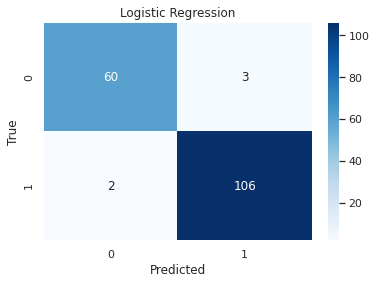

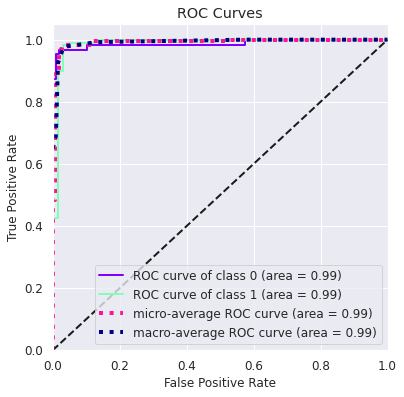

In [22]:
# Winning algorithm based on all metrics (and AUC) is LOGISTIC REGRESSION 

# Confusion matrix and ROC curve

model_specs(model_name='Logistic Regression',model = LogisticRegression(solver='liblinear', multi_class='ovr'))

## Step 6: Model Finalisation
Select the winning algorithm, train over the entire dataset and archive the model for future use.

Accuracy: % 97.0760
Precision: % 97.2477
F1 score: % 97.6959

Confusion Matrix


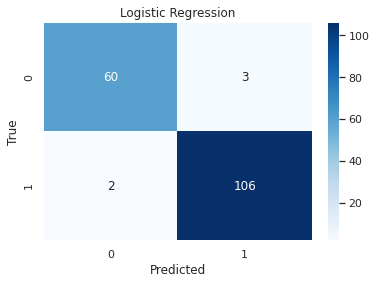

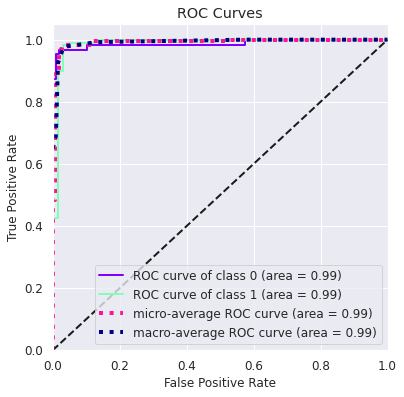

In [23]:
winner_model = LogisticRegression(solver='liblinear', multi_class='ovr')
winner_model_fit = winner_model.fit(data.drop('target',axis=1), data['target'])
#predictions = model.predict(X_test)
#cf_matrix = confusion_matrix(y_test, predictions)
model_specs(model_name='Logistic Regression',model=winner_model)

In [24]:
# save winner 
with open('model_pickle','wb') as f:
    pickle.dump(winner_model,f)


In [25]:
# Neural Network model
N, D = X_train.shape

model_keras = tf.keras.models.Sequential()
model_keras.add(tf.keras.layers.Dense(12, input_dim=D, activation='relu'))
model_keras.add(tf.keras.layers.Dense(8, activation='relu'))
model_keras.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# compile model
model_keras.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model_keras.fit(X_train, y_train, epochs=30, batch_size=10, verbose=0,validation_split=0.2)
# evaluate the model
scores = model_keras.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (model_keras.metrics_names[1], scores[1]*100))

accuracy: 97.99%


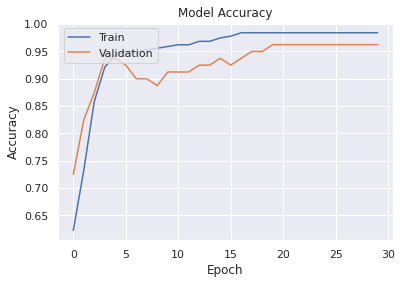

In [26]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

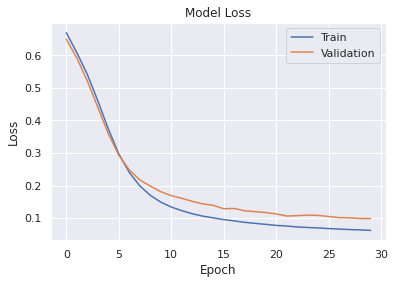

In [27]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [28]:
model_keras.save('K_model')

INFO:tensorflow:Assets written to: K_model/assets


# Discussion
Include here any conluding comments and final remarks.

We have evaluated differet classification algorithms on the sklearn breast cancer data.
After excluding high correlated features to avoid multi colinearity, we proceeded with the analysis.
We split the dataset to 705 train - 30% test and scaled the features.
The centering and scaling statistics of this scaler are based on percentiles
and are therefore not influenced by a few number of very large marginal outliers.
The scaled dataset was then trained and tested using Logistic
Regression,Linear Discriminant Analysis,K-Nearest Neighbours, Decision Tree, gGussian Naive Bayes,SVC and Random Forest algorithms. An initial classification report and confusion matrix were printed to check the model
performance.The best perfoming model was the logistic regression (the model accuracy was used as a metric, but the same coclusion is derived for other metrics such as precision, recall,f1 score and AUC).
The overall models performance could be significantly improved by Hyperparameter tuning.
